<a href="https://colab.research.google.com/github/myDSMLProjects/Deep-Learning/blob/master/L1_and_L2_explained.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [26]:
try:
    %tensorflow_version 2.x
    COLAB = True
    print("Note: using Google CoLab")
except:
    print("Note: not using Google CoLab")
    COLAB = False

Note: using Google CoLab


In [0]:
from sklearn.linear_model import LassoCV
import pandas as pd
import os
import numpy as np
from sklearn import metrics
from scipy.stats import zscore
from sklearn.model_selection import train_test_split 

df = pd.read_csv(
    "https://data.heatonresearch.com/data/t81-558/auto-mpg.csv", 
    na_values=['NA', '?'])

# Handle missing value
df['horsepower'] = df['horsepower'].fillna(df['horsepower'].median())

# Pandas to Numpy
names = ['cylinders', 'displacement', 'horsepower', 'weight',
       'acceleration', 'year', 'origin']
x = df[names].values
y = df['mpg'].values # regression

# Split into train/test
x_train, x_test, y_train, y_test = train_test_split(    
    x, y, test_size=0.25, random_state=45)

In [0]:
# Simple function to evaluate the coefficients of a regression
%matplotlib inline
from IPython.display import display, HTML

def report_coef(names, coef, intercept):
  r = pd.DataFrame({'coef':coef, 'positive':coef>0}, index=names)
  r = r.sort_values(by=['coef'])
  display(r)
  print(f'intercept: {intercept}')
  r['coef'].plot(kind='barh', color=r['positive'].map({True:'b', False:'r'}))

Final score3.0019345985860784


,coef,positive
cylinders,-0.427721,False
weight,-0.007255,False
horsepower,-0.005491,False
displacement,0.020166,True
acceleration,0.138575,True
year,0.783047,True
origin,1.003762,True


intercept: -19.101231042200084


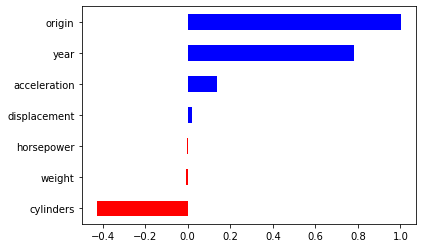

In [29]:
import sklearn

# Create linear regression
regressor = sklearn.linear_model.LinearRegression()

# Fit/train linear regression
regressor.fit(x_train,y_train)
# Predict
pred = regressor.predict(x_test)

# Measure RMSE error
score = np.sqrt(metrics.mean_squared_error(pred, y_test))
print(f'Final score{score}')

report_coef(names, regressor.coef_, regressor.intercept_)

In [0]:
# Lasso = Least absolute shrinkage and selection operator (L1)
# Pushes some of the coefficients to zero and helps to carry out feature selection by nullifiying some of the features
# L! creates sparsity in the neural network


Score3.0604021904033303


,coef,positive
cylinders,-0.012995,False
weight,-0.007328,False
horsepower,-0.002715,False
displacement,0.011601,True
acceleration,0.114391,True
origin,0.708222,True
year,0.777480,True


intercept: -18.506677982383223


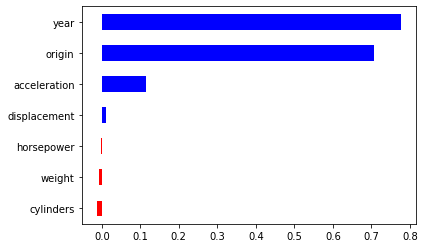

In [31]:
from sklearn.linear_model import Lasso
regressor = Lasso(random_state=0, alpha=0.1)

regressor.fit(x_train, y_train)
pred = regressor.predict(x_test)

score = np.sqrt(metrics.mean_squared_error(pred, y_test))
print(f'Score{score}')
report_coef(names, regressor.coef_, regressor.intercept_)

(1e-08, 100000000.0)

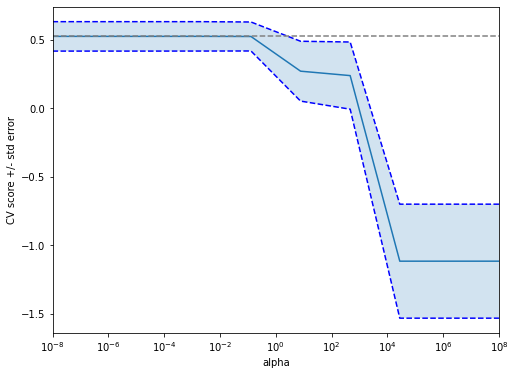

In [32]:
# Exploring the hyperparameter alpha
import numpy as np
import matplotlib.pyplot as plt

from sklearn.linear_model import LassoCV
from sklearn.linear_model import Lasso

from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score

lasso = Lasso(random_state=0)
alphas = np.logspace(-8, 8, 10)

scores = []
scores_std = []

n_folds = 3

for alpha in alphas:
  lasso.alpha = alpha
  this_scores = cross_val_score(lasso, x, y, cv=n_folds, n_jobs=1)
  scores.append(np.mean(this_scores))
  scores_std.append(np.std(this_scores))

scores, scores_std = np.array(scores), np.array(scores_std)

plt.figure().set_size_inches(8, 6)
plt.semilogx(alphas, scores)
# plot error lines showing +/- std. errors of the scores

std_error = scores_std/np.sqrt(n_folds)

plt.semilogx(alphas, scores+std_error, 'b--')
plt.semilogx(alphas, scores-std_error, 'b--')

plt.fill_between(alphas, scores + std_error, scores - std_error, alpha=0.2)
plt.ylabel('CV score +/- std error')
plt.xlabel('alpha')

plt.axhline(np.max(scores), linestyle='--', color='.5')
plt.xlim([alphas[0], alphas[-1]])

In [0]:
# Tikhonov/Ridge/L2 used when less concerned of creating a sparse network and 
# more concerned of reducing the weight values

Final score (RMSE): 3.003649653581502


,coef,positive
cylinders,-0.421393,False
weight,-0.007257,False
horsepower,-0.005385,False
displacement,0.020006,True
acceleration,0.138470,True
year,0.782889,True
origin,0.994621,True


intercept: -19.079800744254825


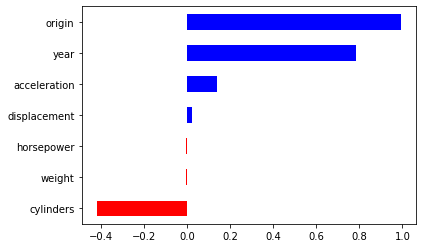

In [39]:
import sklearn
from sklearn.linear_model import Ridge

regressor = Ridge(alpha=1)

# Fit/train Ridge
regressor.fit(x_train,y_train)
# Predict
y_pred = regressor.predict(x_test)

# Measure RMSE error.  RMSE is common for regression.
score = np.sqrt(metrics.mean_squared_error(y_pred,y_test))
print(f"Final score (RMSE): {score}")

report_coef(
  names,
  regressor.coef_,
  regressor.intercept_)
